In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [2]:
url = 'https://api.pushshift.io/reddit/search/submission'

### Subreddit #1 - Wedding Photography

In [3]:
df_wp = pd.DataFrame()

In [4]:
# the first 600 rows
for i in range(1, 7):
    change_utc = '162' + str(i) + '201762'
    changet_utc = int(change_utc)
    params_wp = {
        'subreddit': 'weddingphotography',
        'size': 100,
        'before': change_utc
    }
    res = requests.get(url, params_wp)
    res.status_code
    data = res.json()
    posts = data['data']
    df = pd.DataFrame(posts)
    df = df[['title', 'selftext', 'created_utc','subreddit']]
    df_wp = df_wp.append(df, ignore_index = True)

df_wp

,title,selftext,created_utc,subreddit
0,Establishing a couples engagement/wedding port...,Good day r/WeddingPhotography! \n\nI’m a docum...,1621197660,WeddingPhotography
1,EF 70-200 or RF 70-200,"Hi, \n\nI am looking to see if anyone has any ...",1621172330,WeddingPhotography
2,Absolutely thrilled with how my second wedding...,,1621125372,WeddingPhotography
3,Good health insurance for wedding photographer?,"Hey guys, I know we are all freelancers but is...",1621034510,WeddingPhotography
4,Need Feedback: How to backup photos in 2021?,"Hi folks, \nI am doing research regarding pho...",1621022166,WeddingPhotography
...,...,...,...,...
595,Affordable IG automation ?,"Hey! I know, I know, I shouldn't use automatio...",1624428072,WeddingPhotography
596,Lead photographer wants me to do a free trial ...,I need advice. I can't tell you how many times...,1624404257,WeddingPhotography
597,BRANDING,Does anyone have any recommendations for folks...,1624386770,WeddingPhotography
598,Advice needed: Lens/Body combination Mirrorles...,So I'll be doing a wedding soon and I am plann...,1624373420,WeddingPhotography


In [5]:
# second 600 rows, and then append to the previous df_wp
for i in range(1, 7):
    change_utc = '161' + str(i) + '201762' # adjust utc time here
    changet_utc = int(change_utc)
    params_wp = {
        'subreddit': 'weddingphotography',
        'size': 100,
        'before': change_utc
    }
    res = requests.get(url, params_wp)
    res.status_code
    data = res.json()
    posts = data['data']
    df_1wp = pd.DataFrame(posts)
    df_1wp = df_1wp[['title', 'selftext', 'created_utc','subreddit']]
    df_wp = df_wp.append(df_1wp, ignore_index = True)

df_wp

,title,selftext,created_utc,subreddit
0,Establishing a couples engagement/wedding port...,Good day r/WeddingPhotography! \n\nI’m a docum...,1621197660,WeddingPhotography
1,EF 70-200 or RF 70-200,"Hi, \n\nI am looking to see if anyone has any ...",1621172330,WeddingPhotography
2,Absolutely thrilled with how my second wedding...,,1621125372,WeddingPhotography
3,Good health insurance for wedding photographer?,"Hey guys, I know we are all freelancers but is...",1621034510,WeddingPhotography
4,Need Feedback: How to backup photos in 2021?,"Hi folks, \nI am doing research regarding pho...",1621022166,WeddingPhotography
...,...,...,...,...
1195,Photography = Massive MLM?,Does anyone else feel like the photography ind...,1613689750,WeddingPhotography
1196,How much does my gear matter when second shoot...,"I am trying to get ""hired"" as a second photogr...",1613683489,WeddingPhotography
1197,Swtiched to Lightroom Classsic and colors seem...,Running into an issue that I can't figure out!...,1613670458,WeddingPhotography
1198,Alternative to Lightroom for editing/organizin...,Is anyone using an alternative to Lightroom fo...,1613670386,WeddingPhotography


In [6]:
df_wp['text'] = df_wp['title'] + df_wp['selftext']
df_wp

,title,selftext,created_utc,subreddit,text
0,Establishing a couples engagement/wedding port...,Good day r/WeddingPhotography! \n\nI’m a docum...,1621197660,WeddingPhotography,Establishing a couples engagement/wedding port...
1,EF 70-200 or RF 70-200,"Hi, \n\nI am looking to see if anyone has any ...",1621172330,WeddingPhotography,"EF 70-200 or RF 70-200Hi, \n\nI am looking to ..."
2,Absolutely thrilled with how my second wedding...,,1621125372,WeddingPhotography,Absolutely thrilled with how my second wedding...
3,Good health insurance for wedding photographer?,"Hey guys, I know we are all freelancers but is...",1621034510,WeddingPhotography,Good health insurance for wedding photographer...
4,Need Feedback: How to backup photos in 2021?,"Hi folks, \nI am doing research regarding pho...",1621022166,WeddingPhotography,Need Feedback: How to backup photos in 2021?Hi...
...,...,...,...,...,...
1195,Photography = Massive MLM?,Does anyone else feel like the photography ind...,1613689750,WeddingPhotography,Photography = Massive MLM?Does anyone else fee...
1196,How much does my gear matter when second shoot...,"I am trying to get ""hired"" as a second photogr...",1613683489,WeddingPhotography,How much does my gear matter when second shoot...
1197,Swtiched to Lightroom Classsic and colors seem...,Running into an issue that I can't figure out!...,1613670458,WeddingPhotography,Swtiched to Lightroom Classsic and colors seem...
1198,Alternative to Lightroom for editing/organizin...,Is anyone using an alternative to Lightroom fo...,1613670386,WeddingPhotography,Alternative to Lightroom for editing/organizin...


In [7]:
df_wp.isnull().sum()

title          0
selftext       2
created_utc    0
subreddit      0
text           2
dtype: int64

In [8]:
df_wp.dropna(inplace=True)
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1198 non-null   object
 1   selftext     1198 non-null   object
 2   created_utc  1198 non-null   int64 
 3   subreddit    1198 non-null   object
 4   text         1198 non-null   object
dtypes: int64(1), object(4)
memory usage: 56.2+ KB


### Subreddit #2 - Fashion Photography

In [9]:
df_fp = pd.DataFrame()

In [10]:
# the first 600 rows
for i in range(1, 7):
    change_utc = '162' + str(i) + '815213'
    changet_utc = int(change_utc)
    params_wp = {
        'subreddit': 'fashionphotography',
        'size': 100,
        'before': change_utc
    }
    res = requests.get(url, params_wp)
    res.status_code
    data = res.json()
    posts = data['data']
    df_1 = pd.DataFrame(posts)
    df_1 = df_1[['title', 'selftext', 'created_utc','subreddit']]
    df_fp = df_fp.append(df_1, ignore_index = True)

df_fp

,title,selftext,created_utc,subreddit
0,New at photography. Trying to make my way into...,,1621792396,fashionphotography
1,📷📸,,1621764997,fashionphotography
2,Dark...,,1621764822,fashionphotography
3,Tijuana Angels book,,1621752151,fashionphotography
4,"One of my favorites from my last set, first ti...",,1621736428,fashionphotography
...,...,...,...,...
595,Photography done last summer for I’ternal Stud...,,1617896581,fashionphotography
596,From my very first fashion show about 10 years...,,1617695227,fashionphotography
597,Would like to get your comments for further im...,,1617689804,fashionphotography
598,"“Amante, This Is A French Winter” Captured by ...",,1617641389,fashionphotography


In [11]:
# the second 600 rows and then append to the previous df_fp
for i in range(1, 7):
    change_utc = '161' + str(i) + '815213' # adjust utc time here
    changet_utc = int(change_utc)
    params_wp = {
        'subreddit': 'fashionphotography',
        'size': 100,
        'before': change_utc
    }
    res = requests.get(url, params_wp)
    res.status_code
    data = res.json()
    posts = data['data']
    df_1fp = pd.DataFrame(posts)
    df_1fp = df_1fp[['title', 'selftext', 'created_utc','subreddit']]
    df_fp = df_fp.append(df_1fp, ignore_index = True)

df_fp

,title,selftext,created_utc,subreddit
0,New at photography. Trying to make my way into...,,1621792396,fashionphotography
1,📷📸,,1621764997,fashionphotography
2,Dark...,,1621764822,fashionphotography
3,Tijuana Angels book,,1621752151,fashionphotography
4,"One of my favorites from my last set, first ti...",,1621736428,fashionphotography
...,...,...,...,...
1195,Jay Wright photographed by Vanessa Zican Feng ...,,1606674627,fashionphotography
1196,"Hello, I post here for the first time soooo be...",,1606603066,fashionphotography
1197,Some classic Cecil Beaton Photographs,,1606588860,fashionphotography
1198,Lola Nicon photographed by Dario Catellani for...,,1606406304,fashionphotography


In [12]:
df_fp['text'] = df_fp['title'] + df_fp['selftext']
df_fp

,title,selftext,created_utc,subreddit,text
0,New at photography. Trying to make my way into...,,1621792396,fashionphotography,New at photography. Trying to make my way into...
1,📷📸,,1621764997,fashionphotography,📷📸
2,Dark...,,1621764822,fashionphotography,Dark...
3,Tijuana Angels book,,1621752151,fashionphotography,Tijuana Angels book
4,"One of my favorites from my last set, first ti...",,1621736428,fashionphotography,"One of my favorites from my last set, first ti..."
...,...,...,...,...,...
1195,Jay Wright photographed by Vanessa Zican Feng ...,,1606674627,fashionphotography,Jay Wright photographed by Vanessa Zican Feng ...
1196,"Hello, I post here for the first time soooo be...",,1606603066,fashionphotography,"Hello, I post here for the first time soooo be..."
1197,Some classic Cecil Beaton Photographs,,1606588860,fashionphotography,Some classic Cecil Beaton Photographs
1198,Lola Nicon photographed by Dario Catellani for...,,1606406304,fashionphotography,Lola Nicon photographed by Dario Catellani for...


In [13]:
df_fp.isnull().sum()

title          0
selftext       7
created_utc    0
subreddit      0
text           7
dtype: int64

In [14]:
df_fp.dropna(inplace=True)

In [15]:
df_fp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1193 non-null   object
 1   selftext     1193 non-null   object
 2   created_utc  1193 non-null   int64 
 3   subreddit    1193 non-null   object
 4   text         1193 non-null   object
dtypes: int64(1), object(4)
memory usage: 55.9+ KB


### Subreddit #3 - Cinematography

In [16]:
df_c = pd.DataFrame()

In [17]:
# the first 600 rows
for i in range(1, 7):
    change_utc = '162' + str(i) + '205624'
    changet_utc = int(change_utc)
    params_wp = {
        'subreddit': 'cinematography',
        'size': 100,
        'before': change_utc
    }
    res = requests.get(url, params_wp)
    res.status_code
    data = res.json()
    posts = data['data']
    df_2 = pd.DataFrame(posts)
    df_2 = df_2[['title', 'selftext', 'created_utc','subreddit']]
    df_c = df_c.append(df_2, ignore_index = True)

df_c

,title,selftext,created_utc,subreddit
0,Stills from our upcoming feature film ‘BILLY S...,,1621199378,cinematography
1,Hey Guys! I am making this film with no budget...,,1621195757,cinematography
2,360° 4K 30fps Footage Taken With A 360Rize 360...,,1621191866,cinematography
3,Smallrig Matte Box w/ Xeen 50mm T1.5 CF,Hello there\n\nI've been looking for some matt...,1621190405,cinematography
4,Do you have tips to improve my videos?,,1621189562,cinematography
...,...,...,...,...
595,"Using auto focus on someones head, then switch...",The reason i do this is because when i manuall...,1625795596,cinematography
596,Movi Cinema Robot w/ 12 Pro Max &amp; Moment l...,,1625784323,cinematography
597,Always get excited when this name shows up in ...,,1625782949,cinematography
598,Experimental short advice?,"So I got some spare time on my hands, I finall...",1625782388,cinematography


In [18]:
# the second 600 rows and then append to the previous df_c
for i in range(1, 7):
    change_utc = '162' + str(i) + '205624'
    changet_utc = int(change_utc)
    params_wp = {
        'subreddit': 'cinematography',
        'size': 100,
        'before': change_utc
    }
    res = requests.get(url, params_wp)
    res.status_code
    data = res.json()
    posts = data['data']
    df_2c = pd.DataFrame(posts)
    df_2c = df_2c[['title', 'selftext', 'created_utc','subreddit']]
    df_c = df_c.append(df_2c, ignore_index = True)

df_c

,title,selftext,created_utc,subreddit
0,Stills from our upcoming feature film ‘BILLY S...,,1621199378,cinematography
1,Hey Guys! I am making this film with no budget...,,1621195757,cinematography
2,360° 4K 30fps Footage Taken With A 360Rize 360...,,1621191866,cinematography
3,Smallrig Matte Box w/ Xeen 50mm T1.5 CF,Hello there\n\nI've been looking for some matt...,1621190405,cinematography
4,Do you have tips to improve my videos?,,1621189562,cinematography
...,...,...,...,...
1195,"Using auto focus on someones head, then switch...",The reason i do this is because when i manuall...,1625795596,cinematography
1196,Movi Cinema Robot w/ 12 Pro Max &amp; Moment l...,,1625784323,cinematography
1197,Always get excited when this name shows up in ...,,1625782949,cinematography
1198,Experimental short advice?,"So I got some spare time on my hands, I finall...",1625782388,cinematography


In [19]:
df_c['text'] = df_c['title'] + df_c['selftext']
df_c

,title,selftext,created_utc,subreddit,text
0,Stills from our upcoming feature film ‘BILLY S...,,1621199378,cinematography,Stills from our upcoming feature film ‘BILLY S...
1,Hey Guys! I am making this film with no budget...,,1621195757,cinematography,Hey Guys! I am making this film with no budget...
2,360° 4K 30fps Footage Taken With A 360Rize 360...,,1621191866,cinematography,360° 4K 30fps Footage Taken With A 360Rize 360...
3,Smallrig Matte Box w/ Xeen 50mm T1.5 CF,Hello there\n\nI've been looking for some matt...,1621190405,cinematography,Smallrig Matte Box w/ Xeen 50mm T1.5 CFHello t...
4,Do you have tips to improve my videos?,,1621189562,cinematography,Do you have tips to improve my videos?
...,...,...,...,...,...
1195,"Using auto focus on someones head, then switch...",The reason i do this is because when i manuall...,1625795596,cinematography,"Using auto focus on someones head, then switch..."
1196,Movi Cinema Robot w/ 12 Pro Max &amp; Moment l...,,1625784323,cinematography,Movi Cinema Robot w/ 12 Pro Max &amp; Moment l...
1197,Always get excited when this name shows up in ...,,1625782949,cinematography,Always get excited when this name shows up in ...
1198,Experimental short advice?,"So I got some spare time on my hands, I finall...",1625782388,cinematography,Experimental short advice?So I got some spare ...


In [20]:
df_c.isnull().sum()

title          0
selftext       0
created_utc    0
subreddit      0
text           0
dtype: int64

In [21]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1200 non-null   object
 1   selftext     1200 non-null   object
 2   created_utc  1200 non-null   int64 
 3   subreddit    1200 non-null   object
 4   text         1200 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


### Combine df_wp, df_fp, & df_c

In [22]:
df_half_full = df_wp.append(df_fp, ignore_index = True)
df_half_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2391 non-null   object
 1   selftext     2391 non-null   object
 2   created_utc  2391 non-null   int64 
 3   subreddit    2391 non-null   object
 4   text         2391 non-null   object
dtypes: int64(1), object(4)
memory usage: 93.5+ KB


In [23]:
df_full = df_half_full.append(df_c, ignore_index = True)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3591 non-null   object
 1   selftext     3591 non-null   object
 2   created_utc  3591 non-null   int64 
 3   subreddit    3591 non-null   object
 4   text         3591 non-null   object
dtypes: int64(1), object(4)
memory usage: 140.4+ KB


In [24]:
df_full.drop(columns=['title', 'selftext', 'created_utc'], inplace=True)
df_full

,subreddit,text
0,WeddingPhotography,Establishing a couples engagement/wedding port...
1,WeddingPhotography,"EF 70-200 or RF 70-200Hi, \n\nI am looking to ..."
2,WeddingPhotography,Absolutely thrilled with how my second wedding...
3,WeddingPhotography,Good health insurance for wedding photographer...
4,WeddingPhotography,Need Feedback: How to backup photos in 2021?Hi...
...,...,...
3586,cinematography,"Using auto focus on someones head, then switch..."
3587,cinematography,Movi Cinema Robot w/ 12 Pro Max &amp; Moment l...
3588,cinematography,Always get excited when this name shows up in ...
3589,cinematography,Experimental short advice?So I got some spare ...


Pushshift youtube video follow (link: https://youtu.be/AcrjEWsMi_E)
<br/> params_100 = {
    'subreddit': 'cinematography', 
    'size': 100, 
}
<br/> res = requests.get(url, params_100)
<br/> res.status_code
<br/> data = res.json()
<br/> posts = data['data']
<br/> posts[0]
<br/> len(posts)
<br/> df = pd.DataFrame(posts)
<br/> pd.set_option('display.max_columns', None)
<br/> df.head()
<br/> df_100 = df[['title', 'selftext', 'subreddit']]
<br/> df_100.info()
<br/> df_100

### Model prep

Convert WeddingPhotography = 0, fashionphotography = 1, and cinematography = 2

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words

/Users/emmsytsui/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
df_full['subreddit'].unique()

array(['WeddingPhotography', 'fashionphotography', 'cinematography'],
      dtype=object)

In [27]:
df_full['subreddit'] = df_full['subreddit'].map({
    'WeddingPhotography': 0,
    'fashionphotography': 1,
    'cinematography': 2
})
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3591 non-null   int64 
 1   text       3591 non-null   object
dtypes: int64(1), object(1)
memory usage: 56.2+ KB


In [28]:
df_full.isnull().sum()

subreddit    0
text         0
dtype: int64

In [29]:
X = df_full['text']
y = df_full['subreddit']

In [30]:
# check baseline value to see if we need stratification or not
# baseline score for classification is the majority of the class, in this case it's 33.4%
y.value_counts(normalize=True)

2    0.334169
0    0.333612
1    0.332219
Name: subreddit, dtype: float64

In [31]:
# train test split (for CountVectorizer)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                    test_size=0.25,
                                                   random_state=42)

### Logistic Regression

In [32]:
logreg_cvec = LogisticRegression()
logreg_tvec = LogisticRegression()

#### Stemming is not used in this

### CountVectorizer

In [208]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words='english') #token_pattern='\w+', stop_words='english'

# Fit CountVectorizer
cvec.fit(X_train)

# Transform CountVectorizer
X_train_cvec = cvec.transform(X_train)

X_train_cvec

<2693x8284 sparse matrix of type '<class 'numpy.int64'>'
	with 60602 stored elements in Compressed Sparse Row format>

In [209]:
# Convert X_train into a DataFrame
X_train_cvec_df = pd.DataFrame(X_train_cvec.toarray(),
                         columns=cvec.get_feature_names())

X_train_cvec_df

,00,000,00p,00slightly,0156,020a627f81d6b7845512adaebd3405d607afe113,03,032c,05,07,...,оwn,рiсk,раssed,раssеd,саlled,саllеd,соuplе,റഞ,ലയ,𝘚𝘩𝘦𝘦𝘱𝘴𝘬𝘪𝘯
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
X_train_cvec_df.columns

Index(['00', '000', '00p', '00slightly', '0156',
       '020a627f81d6b7845512adaebd3405d607afe113', '03', '032c', '05', '07',
       ...
       'оwn', 'рiсk', 'раssed', 'раssеd', 'саlled', 'саllеd', 'соuplе', 'റഞ',
       'ലയ', '𝘚𝘩𝘦𝘦𝘱𝘴𝘬𝘪𝘯'],
      dtype='object', length=8284)

In [211]:
# Transform test data set (do not fit test dataset)
X_test_cvec = cvec.transform(X_test)

# Convert X_test into a DataFrame
X_test_cvec_df = pd.DataFrame(X_test_cvec.toarray(),
                        columns=cvec.get_feature_names())

X_test_cvec_df

,00,000,00p,00slightly,0156,020a627f81d6b7845512adaebd3405d607afe113,03,032c,05,07,...,оwn,рiсk,раssed,раssеd,саlled,саllеd,соuplе,റഞ,ലയ,𝘚𝘩𝘦𝘦𝘱𝘴𝘬𝘪𝘯
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
logreg_cvec.fit(X_train_cvec, y_train)

LogisticRegression()

In [172]:
# CountVectorizer Scores without stop_words & token_pattern
print(f'CountVectorizer Training Score: {logreg_cvec.score(X_train_cvec, y_train)}')
print(f'CountVectorizer Testing Score: {logreg_cvec.score(X_test_cvec, y_test)}')

CountVectorizer Training Score: 0.9951726698848867
CountVectorizer Testing Score: 0.955456570155902


In [178]:
# CountVectorizer Scores with token_pattern='\w+' only
print(f'CountVectorizer Training Score: {logreg_cvec.score(X_train_cvec, y_train)}')
print(f'CountVectorizer Testing Score: {logreg_cvec.score(X_test_cvec, y_test)}')

CountVectorizer Training Score: 0.9959153360564427
CountVectorizer Testing Score: 0.9643652561247216


In [184]:
# CountVectorizer Scores with stop_words='english' only
print(f'CountVectorizer Training Score: {logreg_cvec.score(X_train_cvec, y_train)}')
print(f'CountVectorizer Testing Score: {logreg_cvec.score(X_test_cvec, y_test)}')

CountVectorizer Training Score: 0.9925733382844412
CountVectorizer Testing Score: 0.9643652561247216


In [190]:
# CountVectorizer Scores with both stop_words & token_pattern
print(f'CountVectorizer Training Score: {logreg_cvec.score(X_train_cvec, y_train)}')
print(f'CountVectorizer Testing Score: {logreg_cvec.score(X_test_cvec, y_test)}')

CountVectorizer Training Score: 0.9925733382844412
CountVectorizer Testing Score: 0.9599109131403119


#### Confussion Matrix with CountVectorizer

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
# Generate Predictions
preds = logreg_cvec.predict(X_test_cvec)

# Generate Confusion Matrix
confusion_matrix(y_test, preds)

array([[296,  15,   6],
       [  0, 285,   0],
       [  0,  11, 285]])

### TfidVectorizer

In [220]:
# Instantiate TfidVectorizer
tvec = TfidfVectorizer(token_pattern='\w+', stop_words='english')

# Fit TfidVectorizer
tvec.fit(X_train)

# Transform TfidVectorizer
X_train_tvec = tvec.transform(X_train)

# Convert X_train into a DataFrame
X_train_tvec_df = pd.DataFrame(X_train_tvec.toarray(),
                              columns=tvec.get_feature_names())

# Transform test data set (do not fit test dataset)
X_test_tvec = tvec.transform(X_test)

# Convert X_test into a DataFrame
X_test_tvec_df = pd.DataFrame(X_test_tvec.toarray(),
                             columns=tvec.get_feature_names())

# Fit Logistic Regression
logreg_tvec.fit(X_train_tvec, y_train)

LogisticRegression()

In [217]:
# Model Scores without stop_words='english', with token_pattern='\w+'
print(f'TfidVectorizer Training Score: {logreg_tvec.score(X_train_tvec, y_train)}')
print(f'TfidVectorizer Testing Score: {logreg_tvec.score(X_test_tvec, y_test)}')

TfidVectorizer Training Score: 0.9858893427404382
TfidVectorizer Testing Score: 0.9532293986636972


In [221]:
# Model Scores with both stop_words='english' and token_pattern='\w+'
print(f'TfidVectorizer Training Score: {logreg_tvec.score(X_train_tvec, y_train)}')
print(f'TfidVectorizer Testing Score: {logreg_tvec.score(X_test_tvec, y_test)}')

TfidVectorizer Training Score: 0.9877460081693279
TfidVectorizer Testing Score: 0.9665924276169265


In [219]:
# Model Scores with token_pattern='\w+'
print(f'TfidVectorizer Training Score: {logreg_tvec.score(X_train_tvec, y_train)}')
print(f'TfidVectorizer Testing Score: {logreg_tvec.score(X_test_tvec, y_test)}')

TfidVectorizer Training Score: 0.9847753434831044
TfidVectorizer Testing Score: 0.9532293986636972


In [215]:
# Model Scores with stop_words='english'
print(f'TfidVectorizer Training Score: {logreg_tvec.score(X_train_tvec, y_train)}')
print(f'TfidVectorizer Testing Score: {logreg_tvec.score(X_test_tvec, y_test)}')

TfidVectorizer Training Score: 0.9877460081693279
TfidVectorizer Testing Score: 0.9665924276169265


### Pipeline

In [223]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [224]:
cross_val_score(pipe, X_train, y_train, cv=5).mean()

0.9313012531812319

In [225]:
pipe.fit(X_train, y_train)
print(f'Training Score: {pipe.score(X_train, y_train)}')
print(f'Testing Score: {pipe.score(X_test, y_test)}')


Training Score: 0.9858893427404382
Testing Score: 0.9532293986636972


### GridSearchCV on TfidVectorizer

In [233]:
pipe_params = {
    'tvec__max_features' : [1000, 5000],
    'tvec__min_df' : [0.05, 0.15],
    'tvec__max_df' : [0.8, 0.9],
    'tvec__ngram_range' : [(1, 1), (1, 2)],
}

gs = GridSearchCV(pipe,
                 param_grid=pipe_params,
                 cv = 5)

gs.fit(X_train, y_train)

print(f'GridSearchCV Best Score: {gs.best_score_}')


GridSearchCV Best Score: 0.795397645371092


In [227]:
# Save best model as gs_model
gs_model = gs.best_estimator_

# Score model on training set
gs_model.score(X_train, y_train)
print(f'GridSearchCV Training Dataset Score: {gs_model.score(X_train, y_train)}')

# Score model on testing set
gs_model.score(X_test, y_test)
print(f'GridSearchCV Testing Dataset Score: {gs_model.score(X_test, y_test)}')

# Which model combination gives us the best result?
gs.best_params_
print(f'GridSearchCV Best Result Model Combination: {gs.best_params_}')

GridSearchCV Training Dataset Score: 0.8299294467137022
GridSearchCV Testing Dataset Score: 0.7594654788418709
GridSearchCV Best Result Model Combination: {'tvec__max_df': 0.8, 'tvec__max_features': 1000, 'tvec__min_df': 0.05, 'tvec__ngram_range': (1, 2)}


### KNN Model

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [107]:
df_full

,subreddit,text
0,0,Establishing a couples engagement/wedding port...
1,0,"EF 70-200 or RF 70-200Hi, \n\nI am looking to ..."
2,0,Absolutely thrilled with how my second wedding...
3,0,Good health insurance for wedding photographer...
4,0,Need Feedback: How to backup photos in 2021?Hi...
...,...,...
3586,2,"Using auto focus on someones head, then switch..."
3587,2,Movi Cinema Robot w/ 12 Pro Max &amp; Moment l...
3588,2,Always get excited when this name shows up in ...
3589,2,Experimental short advice?So I got some spare ...


In [108]:
# Create X and y
X_knn = X_train_cvec_df #X_knn from using cvec dataframe that has already been countvectorized
y_knn = y_train

# using cvec dataframe means that the shape of X_knn is 25% smaller than the original dataframe... 
# hence, we lost some data

In [109]:
y_knn.value_counts(normalize=True)

1    0.337170
2    0.335685
0    0.327144
Name: subreddit, dtype: float64

In [110]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, 
                                                                   y_knn,
                                                                   test_size=0.25, 
                                                                   random_state=42)

In [111]:
# Check the shape of X_train_knn, X_test_knn, y_train_knn, y_test_knn
y_test_knn.shape

(674,)

In [112]:
# This takes forever to run, please don't run it unless it's absolutely necessary.
# Standardize & Fit 
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train_knn)
X_test_ss = ss.transform(X_test_knn)

# Instantiate KNN for k=3, k=5, k=15
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_15 = KNeighborsClassifier(n_neighbors=15)

# Cross Validation
print(f'Cross Val Score k=3: {cross_val_score(knn_3, X_train_ss, y_train_knn, cv=5).mean()}')
print(f'Cross Val Score k=5: {cross_val_score(knn_5, X_train_ss, y_train_knn, cv=5).mean()}')
print(f'Cross Val Score k=15: {cross_val_score(knn_15, X_train_ss, y_train_knn, cv=5).mean()}')
print('')

# Fit each KNN training model
knn_3.fit(X_train_ss, y_train_knn)
knn_5.fit(X_train_ss, y_train_knn)
knn_15.fit(X_train_ss, y_train_knn)

# KNN Scores
print(f'KNN Training Model Score k=3: {knn_3.score(X_train_ss, y_train_knn)}')
print(f'KNN Testing Model Score k=3: {knn_3.score(X_test_ss, y_test_knn)}')
print('')
print(f'KNN Training Model Score k=5: {knn_5.score(X_train_ss, y_train_knn)}')
print(f'KNN Testing Model Score k=5: {knn_5.score(X_test_ss, y_test_knn)}')
print('')
print(f'KNN Training Model Score k=15: {knn_15.score(X_train_ss, y_train_knn)}')
print(f'KNN Testing Model Score k=15: {knn_15.score(X_test_ss, y_test_knn)}')

Cross Val Score k=3: 0.4977520084514655
Cross Val Score k=5: 0.4125715549222416
Cross Val Score k=15: 0.34472274770901407

KNN Training Model Score k=3: 0.7894997523526498
KNN Testing Model Score k=3: 0.5341246290801187

KNN Training Model Score k=5: 0.5636453689945518
KNN Testing Model Score k=5: 0.456973293768546

KNN Training Model Score k=15: 0.35066864784546803
KNN Testing Model Score k=15: 0.3397626112759644


In [160]:
# Find the best K ** THIS TAKES FOREVER TO RUN PLEASE DON'T RUN IT UNLESS ABSOLUTELY NECESSARY **
scores = []

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn, X_train_ss, y_train_knn, cv=5).mean())

scores

[0.6983784978994179,
 0.5745534727169987,
 0.4977520084514655,
 0.4442682357565781,
 0.4125715549222416,
 0.37988846031005086,
 0.37492936638577007,
 0.3670073458958799,
 0.3595791465002579,
 0.35363609561948744,
 0.3481893226543497,
 0.3471992236444487,
 0.34472274770901407,
 0.3442276982040636,
 0.34472274770901407]

Text(0, 0.5, 'Training Scores')

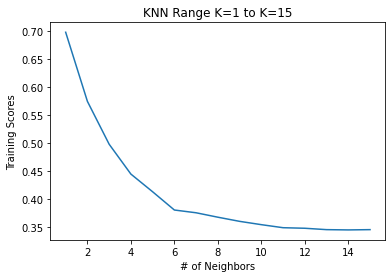

In [162]:
import matplotlib.pyplot as plt
plt.plot(range(1, 16), scores)
plt.title('KNN Range K=1 to K=15')
plt.xlabel('# of Neighbors')
plt.ylabel('Training Scores')

In [129]:
# Find the best K **OLD VERSION WTIHOUT TOKENIZER & STOP WORDS** DO NOT DELETE
scores = []

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn, X_train_ss, y_train_knn, cv=5).mean())

scores

[0.6983809547207822,
 0.5730658673807827,
 0.49329533449622875,
 0.4437719578409454,
 0.4086099304719554,
 0.3793921823944181,
 0.3754256443014029,
 0.3660184752966612,
 0.35908409699530747,
 0.35313981770385466,
 0.346702945728816,
 0.3467041741394983,
 0.3452177972139646,
 0.34472274770901407]

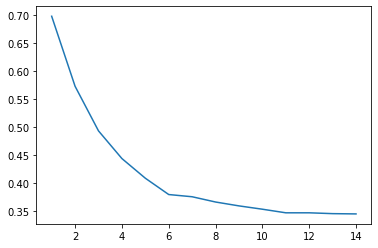

In [133]:
import matplotlib.pyplot as plt
plt.plot(range(1, 15), scores)

### Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [114]:
# Create X and y
X_rf = X_train_cvec_df #X_knn from using cvec dataframe that has already been countvectorized
y_rf = y_train

# using cvec dataframe means that the shape of X_knn is 25% smaller than the original dataframe... 
# hence, we lost some data

In [115]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf,
                                                               y_rf,
                                                               test_size=0.25,
                                                               random_state=42)

In [116]:
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [163]:
print(f'Random Forest Training Score: {cross_val_score(rf, X_train_rf, y_train_rf, cv=5).mean()}')
print(f'Extreme Tree Training Score: {cross_val_score(et, X_train_rf, y_train_rf, cv=5).mean()}')

Random Forest Training Score: 0.8845945016337863
Extreme Tree Training Score: 0.8880684470432154


In [164]:
print(f'Random Forest Testing Score: {cross_val_score(rf, X_test_rf, y_test_rf, cv=5).mean()}')
print(f'Extreme Tree Testing Score: {cross_val_score(et, X_test_rf, y_test_rf, cv=5).mean()}')

Random Forest Testing Score: 0.784864566058596
Extreme Tree Testing Score: 0.7789718076285241


### Grid Search on Random Forest

In [165]:
rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 3, 4, 5]
}

gs = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose=1)

gs.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [166]:
print(f'Random Forest Model Best Score: {gs.best_score_}')
print('')
print(f'Random Forest Model Best Combination: {gs.best_params_}')
print('')
print(f'Random Forest Training Model Score: {gs.score(X_train_rf, y_train_rf)}')
print('')
print(f'Ramdom Forest Training Model Best Estimator Score: {gs.best_estimator_.score(X_train_rf, y_train_rf)}')
print('')
print(f'Random Forest Testing Model Score: {gs.score(X_test_rf, y_test_rf)}')
print('')
print(f'Ramdom Forest Testing Model Best Estimator Score: {gs.best_estimator_.score(X_test_rf, y_test_rf)}')
print('')

Random Forest Model Best Score: 0.8910387440729185

Random Forest Model Best Combination: {'max_depth': None, 'n_estimators': 200}

Random Forest Training Model Score: 0.9970282317979198

Ramdom Forest Training Model Best Estimator Score: 0.9970282317979198

Random Forest Testing Model Score: 0.9317507418397626

Ramdom Forest Testing Model Best Estimator Score: 0.9317507418397626



In [127]:
# OLD VERSION WITHOUT TOKENIZER & STOP WORDS
print(f'Random Forest Model Best Score: {gs.best_score_}')
print('')
print(f'Random Forest Model Best Combination: {gs.best_params_}')
print('')
print(f'Random Forest Training Model Score: {gs.score(X_train_rf, y_train_rf)}')
print('')
print(f'Ramdom Forest Training Model Best Estimator Score: {gs.best_estimator_.score(X_train_rf, y_train_rf)}')
print('')
print(f'Random Forest Testing Model Score: {gs.score(X_test_rf, y_test_rf)}')
print('')
print(f'Ramdom Forest Testing Model Best Estimator Score: {gs.best_estimator_.score(X_test_rf, y_test_rf)}')
print('')

Random Forest Model Best Score: 0.8895523671473848

Random Forest Model Best Combination: {'max_depth': None, 'n_estimators': 100}

Random Forest Training Model Score: 0.9970282317979198

Ramdom Forest Training Model Best Estimator Score: 0.9970282317979198

Random Forest Testing Model Score: 0.9362017804154302

Ramdom Forest Testing Model Best Estimator Score: 0.9362017804154302

